# Riddler Express
### From Anna Engelsone comes a riddle about a historic chess battle:

The infamous 1984 World Chess Championship match between the reigning world champion Anatoly Karpov and 21-year-old Garry Kasparov was supposed to have been played until either player had won six games. Instead, it went on for 48 games: Karpov won five, Kasparov won 3, and the other 40 games each ended in a draw. Alas, the match was controversially terminated without a winner.

We can deduce from the games Karpov and Kasparov played that, independently of other games, Karpov’s chances of winning each game were 5/48, Kasparov’s chances were 3/48, and the chances of a draw were 40/48. Had the match been allowed to continue indefinitely, what would have been Kasparov’s chances of eventually winning the match?

[https://fivethirtyeight.com/features/can-you-solve-a-particularly-prismatic-puzzle/](https://fivethirtyeight.com/features/can-you-solve-a-particularly-prismatic-puzzle/)

In [1]:
import numpy as np

In [2]:
def play_game(karpov, kasparov, draw):
    return np.random.choice(['karpov', 'kasparov', 'draw'], p=[karpov, kasparov, draw])

In [3]:
def play_tournament(karpov, kasparov, draw, wins_needed):
    karpov_wins = 0
    kasparov_wins = 0
    draws = 0
    
    while karpov_wins < wins_needed and kasparov_wins < wins_needed:
        winner = play_game(karpov, kasparov, draw)
        if winner == 'karpov':
            karpov_wins += 1
        elif winner == 'kasparov':
            kasparov_wins += 1
        elif winner == 'draw':
            draws += 1

    if karpov_wins == wins_needed:
        return 'karpov'
    elif kasparov_wins == wins_needed:
        return 'kasparov'

In [4]:
karpov = 5/48
kasparov = 3/48
draw = 40/48

wins_needed = 6

karpov_wins = 0
kasparov_wins = 0

i = 1000000

for tournament in range(i):
    winner = play_tournament(karpov, kasparov, draw, wins_needed)
    if winner == 'karpov':
        karpov_wins += 1
    if winner == 'kasparov':
        kasparov_wins += 1

In [5]:
print(karpov_wins)
print(kasparov_wins)

805549
194451


In [6]:
print('Odds of a Kasparov win:', '{:.1f}%'.format(100 * kasparov_wins / (karpov_wins + kasparov_wins)))

Odds of a Kasparov win: 19.4%


# Riddler Classic
### From Steve Abney comes a particularly prismatic puzzle:

Suppose I have a rectangle whose side lengths are each a whole number, and whose area (in square units) is the same as its perimeter (in units of length). What are the possible dimensions for this rectangle?

Alas, that’s not the riddle — that’s just the appetizer. The rectangle could be 4 by 4 or 3 by 6. You can check both of these: 4 · 4 = 16 and 4 + 4 + 4 + 4 = 16, while 3 · 6 = 18 and 3 + 6 + 3 + 6 = 18. These are the only two whole number dimensions the rectangle could have. (One way to see this is to call the rectangle’s length a and its width b. You’re looking for whole number solutions to the equation ab = 2a + 2b.)

On to the main course! Instead of rectangles, let’s give rectangular prisms a try. What whole number dimensions can rectangular prisms have so that their volume (in cubic units) is the same as their surface area (in square units)?

To get you started, Steve notes that 6 by 6 by 6 is one such solution. How many others can you find?

[https://fivethirtyeight.com/features/can-you-solve-a-particularly-prismatic-puzzle/](https://fivethirtyeight.com/features/can-you-solve-a-particularly-prismatic-puzzle/)

#### 2D example

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [8]:
x = [x / 10 for x in list(range(1, 101))]
y = [y / 10 for y in list(range(1, 101))]
val = [(i, j, (i*j)/(2*i+2*j)) for j in y for i in x]

In [9]:
x, y, z = zip(*val)

In [10]:
grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

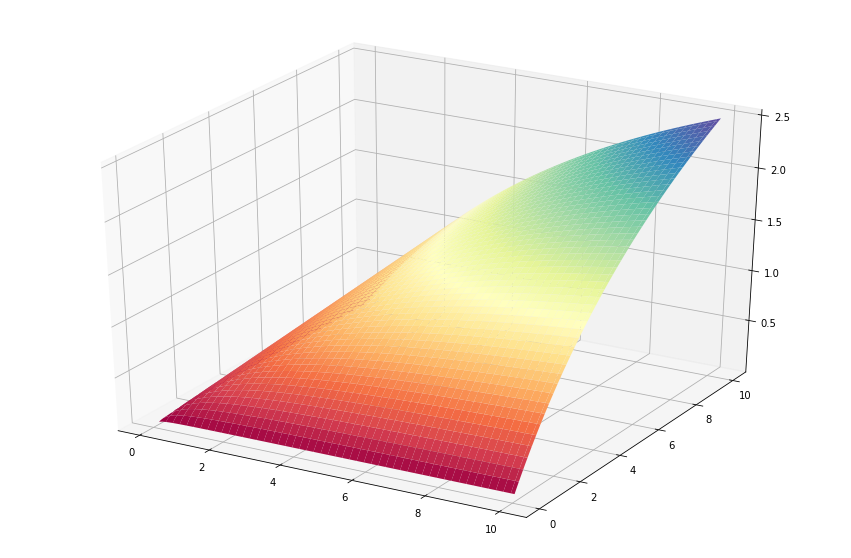

In [11]:
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
ax.plot_surface(grid_x, grid_y, grid_z, cmap=plt.cm.Spectral)
plt.show()

#### 3D problem

In [12]:
from itertools import combinations_with_replacement

In [13]:
def check_append(x, y, z, answers):
    v = x * y * z
    sa = (2 * x * y) + (2 * x * z) + (2 * y * z)
    if v == sa:
        answers.append((x, y, z))
    return answers

In [14]:
answers = []

iter = 1000

for dimensions in combinations_with_replacement(range(1, iter + 1), 3):
    answers = check_append(dimensions[0], dimensions[1], dimensions[2], answers)

In [15]:
for answer in answers:
    print(answer)

(3, 7, 42)
(3, 8, 24)
(3, 9, 18)
(3, 10, 15)
(3, 12, 12)
(4, 5, 20)
(4, 6, 12)
(4, 8, 8)
(5, 5, 10)
(6, 6, 6)
